In [347]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import re
from datetime import datetime as dt

import json

In [ ]:
rawGames = pd.read_csv('SteamAppsInfo.csv', encoding = "ISO-8859-1")

In [182]:
rawGames

,appId,name,developerName,releaseDate,price,numReviews,positiveReviewPercentage,appGenre,tagsList,appType,dlcBool,appDesc,alteredTextBool
0,1688200,War Of Gold,"Tero Lunkka,Valkeala Software","Aug 22, 2021",0.59,15.0,66%,"['Action', 'Casual', 'Indie']","['Casual', 'Action', '3D Fighter', 'Shooter', ...",All Games,False,You super hero soldier need save robber gold b...,False
1,1688210,Utopia,Iconic Ideaz,"Jan 7, 2022",NaN,NaN,NaN,"['Action', 'Adventure', 'Massively Multiplayer...","['Early Access', 'RPG', 'Survival', 'Colorful'...",All Games,False,UTOPIA is an open world survival game set in a...,False
2,1688220,Fire & Reign,Siphon Shock,Jun 2022,NaN,NaN,NaN,"['Action', 'Indie']","['Bullet Hell', 'Action', ""Shoot 'Em Up"", 'Sho...",All Games,False,Upgrade your warriors and shoot through waves ...,False
3,1688240,Escape from the Office,"ParachuteGames, ImperiumGame","Jul 26, 2021",2.99,12.0,91%,"['Action', 'Indie']","['Action', 'Precision Platformer', 'Perma Deat...",All Games,False,Escape from the Office is a 2D side-scrolling ...,False
4,1688250,PRINCESS IN AIRINESS,Broken Desk,"Jul 26, 2021",3.99,2.0,NaN,"['Action', 'Indie']","['Action', 'Point & Click', '2D Platformer', '...",All Games,False,"To pray for peace, the princess once again fli...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113005,1972180,Dub Club,Cyberfunk Studios LLC,"May 20, 2022",0.00,NaN,NaN,"['Casual', 'Free to Play']","['Casual', 'Rhythm', 'Exploration', 'Third Per...",All Games,False,A third person multiplayer virtual music venue...,False
113006,1595760,ScreenSpace,Wave Project,"Apr 23, 2021",1.99,1.0,NaN,"['Casual', 'Indie']","['Casual', 'Clicker', 'Arcade', 'Point & Click...",All Games,False,Test your focus and reflexes in this simplisti...,False
113007,1996680,Fowl Scourge,Void Cup Games,When its done,NaN,NaN,NaN,"['Action', 'Indie', 'RPG']",[],All Games,False,In this Dark Fantasy Action-RPG you are part o...,False
113008,1972250,Project: Maidenless,Grossly Incandescent Games,TBA,NaN,NaN,NaN,"['Action', 'Adventure', 'Indie', 'Massively Mu...","['Early Access', 'Action', 'Adventure', 'RPG',...",All Games,False,Scavenge for loot in an unforgiving world fill...,False


In [391]:
#Now to try and get the dates.
#
#Note that this script eliminates dates which don't fit certain date formats.
#
#For example, it converts "Coming Soon" to NaN.
def datesCleaned(dataframe):
    
    datesCleaned = [];
    
    #Convert to dt format
    for i in dataframe['releaseDate']:
        try:
            datesCleaned.append(dt.strptime(i, '%b %d, %Y'))
        except:
            try:
                datesCleaned.append(dt.strptime(i, '%b, %Y'))
                
            except:
                try: datesCleaned.append(dt.strptime(i, '%b %Y'))
                    
                except:
                    datesCleaned.append(np.nan)
            
    datesCleanedSeries = pd.Series(datesCleaned)
    
    datesCleanedSeries.index = dataframe.index
    
    return datesCleanedSeries

datesCleaned = datesCleaned(rawGames)

#Replece release dates with cleaned dates
rawGames['releaseDate'] = datesCleaned
        
# #Add cleaned release dates to dataframes
# ncrpgs_df['releaseDate'] = rpgDatesCleaned[ncrpgs_df.index]
# crpgs_df['releaseDate'] = rpgDatesCleaned[crpgs_df.index]

In [392]:
#Find all non-DLC RPGs and CRPGs
rpgs = rawGames[[('RPG' in rawGames.tagsList[i]) or ('CRPG' in rawGames.tagsList[i])
                 for i in range(len(rawGames))]][rawGames['dlcBool'] == False]

C:\Users\isam1\AppData\Local\Temp\ipykernel_19808\183280176.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rpgs = rawGames[[('RPG' in rawGames.tagsList[i]) or ('CRPG' in rawGames.tagsList[i])


In [393]:
def rpgTagsCleaned():
    
    rpgTagsCleaned = []
    
    for k in rpgs.index:
        
        #Get rid of \' \s \em etc.
        tagsRemovedSlashes = re.findall(r"'(.*?)'[,\]]",rpgs.tagsList[k]\
                                        .replace("\'s","s").replace("\'em","em")\
                                        .replace("\'Em","Em").replace("\'","''"))
        
        rpgTagsCleaned.append([tagsRemovedSlashes[j].replace("'","") for j in range(len(tagsRemovedSlashes))])
        
    rpgTagsCleanedSeries = pd.Series(rpgTagsCleaned)
    
    rpgTagsCleanedSeries.index = rpgs.index
        
    return rpgTagsCleanedSeries

rpgTagsCleaned = rpgTagsCleaned()

print(rpgTagsCleaned[0:5])

1     [Early Access, RPG, Survival, Colorful, Base B...
8     [Roguelite, Roguelike, Class-Based, Dungeon Cr...
17    [Survival Horror, Exploration, 2D Platformer, ...
26    [Action, RPG, Action RPG, Hack and Slash, 3D, ...
27    [Action, RPG, Action RPG, Hack and Slash, 3D, ...
dtype: object


In [394]:
def tagBool(dataframe,tagName):
    
    #Check for a tag name in every game in dataframe
    tagBoolSeries = pd.Series([tagName in dataframe[j] for j in dataframe.index])
    
    tagBoolSeries.index = rpgs.index
    return tagBoolSeries

#Get list of Booleans corresponding to whether the game is a CRPG
crpgBool = tagBool(rpgTagsCleaned, 'CRPG')

In [395]:
#All CRPGs
crpgs_df = rpgs.copy()[crpgBool.tolist()]

#All non-CRPG RPGs (nCRPGs)
ncrpgs_df = rpgs.copy()[np.logical_not(crpgBool.tolist())]

In [396]:
ncrpgs_df.head()

,appId,name,developerName,releaseDate,price,numReviews,positiveReviewPercentage,appGenre,tagsList,appType,dlcBool,appDesc,alteredTextBool
1,1688210,Utopia,Iconic Ideaz,2022-01-07,NaN,NaN,NaN,"['Action', 'Adventure', 'Massively Multiplayer...","['Early Access', 'RPG', 'Survival', 'Colorful'...",All Games,False,UTOPIA is an open world survival game set in a...,False
8,1688320,OneBit Adventure,"Galactic Slice, LLC",2022-08-05,0.00,NaN,NaN,"['Adventure', 'Casual', 'Free to Play', 'Indie...","['Roguelite', 'Roguelike', 'Class-Based', 'Dun...",All Games,False,OneBit Adventure is a casual turn-based roguel...,False
17,1688470,Rat Prison,Crooked Road,2021-07-22,0.99,NaN,NaN,"['Casual', 'Indie', 'Simulation', 'Strategy']","['Survival Horror', 'Exploration', '2D Platfor...",All Games,False,Rat Prison - pixel 2D simulator with horror el...,False
26,1688600,Emperial Knights,Yacine Kalache,2022-04-20,9.99,NaN,NaN,"['Action', 'RPG', 'Early Access']","['Action', 'RPG', 'Action RPG', 'Hack and Slas...",All Games,False,You incarnate as a powerful knight to help the...,False
27,1688630,Emperial Knights,Yacine Kalache,2022-04-20,9.99,NaN,NaN,"['Action', 'RPG', 'Early Access']","['Action', 'RPG', 'Action RPG', 'Hack and Slas...",All Games,False,You incarnate as a powerful knight to help the...,False


In [397]:
crpgs_df.head()

,appId,name,developerName,releaseDate,price,numReviews,positiveReviewPercentage,appGenre,tagsList,appType,dlcBool,appDesc,alteredTextBool
218,1686130,Deep Despair 2,BekkerDev Studio,2021-10-08,6.99,67.0,88%,"['Adventure', 'Indie', 'RPG', 'Simulation']","['Sandbox', 'Crafting', 'Adventure', 'Survival...",All Games,False,Deep Despair 2 is an open world survival adven...,False
458,1684240,Metal Faith,Youth Game,2021-08-02,9.99,NaN,NaN,"['Adventure', 'Indie', 'RPG']","['Adventure', 'RPG', 'Action-Adventure', 'Shoo...",All Games,False,A 3D adventure puzzle game,False
459,1684250,The Evil Farming Game: Replanted,Jeremy Does Stupid Stuff,NaT,0.00,NaN,NaN,"['Adventure', 'Free to Play', 'Indie', 'RPG']","['RPG', 'Psychological Horror', 'Horror', 'Mul...",All Games,False,"What will you do when you, an ordinary farmer,...",False
464,1684310,The Evil Farming Game: Replanted,Jeremy Does Stupid Stuff,NaT,0.00,NaN,NaN,"['Adventure', 'Free to Play', 'Indie', 'RPG']","['RPG', 'Psychological Horror', 'Horror', 'Mul...",All Games,False,"What will you do when you, an ordinary farmer,...",False
479,1683870,Crystalreach Islands,Majao Games,NaT,NaN,NaN,NaN,['RPG'],"['RPG', 'Fantasy', 'Action RPG', 'Open World',...",All Games,False,Crystalreach Islands is an open-world action R...,False


In [306]:
rpgs.tagsList.replace("\'s","s").replace("\'em","em").replace("\'Em","Em").replace("\'","''")

1         ['Early Access', 'RPG', 'Survival', 'Colorful'...
8         ['Roguelite', 'Roguelike', 'Class-Based', 'Dun...
17        ['Survival Horror', 'Exploration', '2D Platfor...
26        ['Action', 'RPG', 'Action RPG', 'Hack and Slas...
27        ['Action', 'RPG', 'Action RPG', 'Hack and Slas...
                                ...                        
112996    ['Early Access', 'Survival', 'Immersive Sim', ...
112999    ['Tactical RPG', 'PvP', 'Action', 'Hack and Sl...
113003    ['Strategy', 'Grand Strategy', 'Turn-Based Str...
113004    ['Action', 'RPG', '2D Fighter', '3D Fighter', ...
113008    ['Early Access', 'Action', 'Adventure', 'RPG',...
Name: tagsList, Length: 17121, dtype: object

In [398]:
rpgDates = datesCleaned[rpgs.index]

In [401]:
#Plot number of CRPGs and nCRPGs over time

plt.figure()

start_date = min(rpgDates).year
end_date = datetime.now().year

dates = range(start_date,end_date+1)

allGamesCount=[]
for date in dates:
    #How many games were released before "date"?
    allGamesCount.append(len(rawGames[[datesCleaned[i].year < date for i in rawGames.index]].index))

ncrpgCount = []
for date in dates:
    #How many nCRPGs were released before "date"?
    ncrpgCount.append(len(ncrpgs_df[[rpgDates[i].year < date for i in ncrpgs_df.index]].index))
    
crpgCount = []
for date in dates:
    #How many nCRPGs were released before "date"?
    crpgCount.append(len(crpgs_df[[rpgDates[i].year < date for i in crpgs_df.index]].index))


<Figure size 432x288 with 0 Axes>

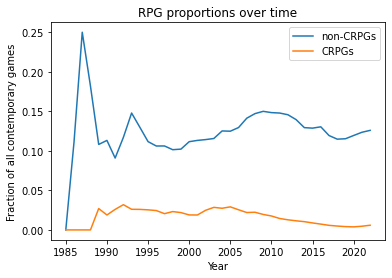

In [403]:
plt.figure()
plt.plot([dates[i] for i in range(len(dates)) if allGamesCount[i]>0], [ncrpgCount[i]/allGamesCount[i] for i in range(len(dates)) if allGamesCount[i]>0],label='non-CRPGs')
plt.plot([dates[i] for i in range(len(dates)) if allGamesCount[i]>0], [crpgCount[i]/allGamesCount[i] for i in range(len(dates)) if allGamesCount[i]>0],label='CRPGs')
# plt.plot(dates, crpgCount)

plt.title('RPG proportions over time')
plt.xlabel('Year')
plt.ylabel('Fraction of all contemporary games')

plt.legend()

In [373]:
len(ncrpgs_df[[rpgDatesCleaned[i].year < 2020 for i in ncrpgs_df.index]].index)

2022

In [239]:
rpgs.tagsList[rpgs.index[0]]

"['Early Access', 'RPG', 'Survival', 'Colorful', 'Base Building', 'Crafting', 'Roguelite', 'Adventure', 'Cute', 'Open World', 'Combat', 'Action', 'Building', 'Procedural Generation', 'Shooter', 'Stylized', 'Third-Person Shooter', 'Exploration', '3D', 'Third Person']"

In [266]:
rpgsTagsCleaned.unique()

array(['Early Access', 'RPG', 'Survival', 'Colorful', 'Base Building',
       'Crafting', 'Roguelite', 'Adventure', 'Cute', 'Open World',
       'Combat', 'Action', 'Building', 'Procedural Generation', 'Shooter',
       'Stylized', 'Third-Person Shooter', 'Exploration', '3D',
       'Third Person', 'Roguelike', 'Class-Based', 'Dungeon Crawler',
       'Retro', 'Minimalist', 'Singleplayer', 'Fantasy',
       'Traditional Roguelike', 'Perma Death', 'Turn-Based Combat',
       'Family Friendly', '2D', 'Casual', 'Lovecraftian', 'Loot',
       'Turn-Based Strategy', 'Strategy', 'Survival Horror',
       '2D Platformer', 'Puzzle Platformer', 'Mystery Dungeon', 'Puzzle',
       'Underground', 'Investigation', 'Medieval', 'Dark', 'Platformer',
       'Strategy RPG', 'Horror', 'Simulation', 'Action RPG',
       'Hack and Slash', 'PvP', 'Multiplayer', 'Local Multiplayer',
       'Life Sim', 'Pixel Graphics', 'Grid-Based Movement', 'Indie',
       'Relaxing', 'Controller', 'Dating Sim', 'Agricult

In [201]:
'[\'Adventure\', \'RPG\', \'Action\', \'Action-Adventure\', \'Platformer\', \'2D Platformer\', \'Puzzle Platformer\', \'Roguevania\', \'2D\', \'Anime\', \'Colorful\', \'Cute\', \'1980s\', "1990\'s", \'Atmospheric\', \'PvP\', \'Multiplayer\', \'Singleplayer\', \'Indie\', \'Nudity\', \'VR\']'.replace("\'s","s").replace('\'e',"e").replace('\'E',"e").replace('"',"'").replace("\'","'")

"['Adventure', 'RPG', 'Action', 'Action-Adventure', 'Platformer', '2D Platformer', 'Puzzle Platformer', 'Roguevania', '2D', 'Anime', 'Colorful', 'Cute', '1980s', '1990s', 'Atmospheric', 'PvP', 'Multiplayer', 'Singleplayer', 'Indie', 'Nudity', 'VR']"

In [104]:
re.findall(r"'(.*?)'[,\]]",'[\'Adventure\', \'RPG\', \'Action\', \'Action-Adventure\', \'Platformer\', \'2D Platformer\', \'Puzzle Platformer\', \'Roguevania\', \'2D\', \'Anime\', \'Colorful\', \'Cute\', \'1980s\', "1990\'s", \'Atmospheric\', \'PvP\', \'Multiplayer\', \'Singleplayer\', \'Indie\', \'Nudity\']')

['Adventure',
 'RPG',
 'Action',
 'Action-Adventure',
 'Platformer',
 '2D Platformer',
 'Puzzle Platformer',
 'Roguevania',
 '2D',
 'Anime',
 'Colorful',
 'Cute',
 '1980s',
 's", \'Atmospheric',
 'PvP',
 'Multiplayer',
 'Singleplayer',
 'Indie',
 'Nudity']

In [97]:
rpgs.tagsList.tolist()

["['Early Access', 'RPG', 'Survival', 'Colorful', 'Base Building', 'Crafting', 'Roguelite', 'Adventure', 'Cute', 'Open World', 'Combat', 'Action', 'Building', 'Procedural Generation', 'Shooter', 'Stylized', 'Third-Person Shooter', 'Exploration', '3D', 'Third Person']",
 "['Roguelite', 'Roguelike', 'Class-Based', 'Dungeon Crawler', 'Retro', 'Adventure', 'Minimalist', 'Singleplayer', 'Fantasy', 'Traditional Roguelike', 'Perma Death', 'Turn-Based Combat', 'Family Friendly', '2D', 'Casual', 'Lovecraftian', 'Loot', 'RPG', 'Turn-Based Strategy', 'Strategy']",
 "['Survival Horror', 'Exploration', '2D Platformer', 'Puzzle Platformer', 'Mystery Dungeon', 'Dungeon Crawler', 'Puzzle', 'Survival', 'Underground', 'Investigation', 'Medieval', 'Dark', 'Perma Death', 'Platformer', 'Strategy', 'Strategy RPG', '2D', 'Third Person', 'Horror', 'Simulation']",
 "['Action', 'RPG', 'Action RPG', 'Hack and Slash', '3D', 'Third Person', 'Fantasy', 'PvP', 'Combat', 'Early Access', 'Multiplayer', 'Singleplayer',

In [143]:
string = "['RPG', 'Turn-Based Strategy', 'Dungeon Crawler', 'Procedural Generation', 'Exploration', '2D', 'Hand-drawn', 'Dark Fantasy', 'Tactical RPG', 'Singleplayer', 'Female Protagonist', 'Colorful', 'Turn-Based Tactics', 'Isometric', 'Fantasy', 'Tactical', 'Lore-Rich', 'Class-Based', 'Indie']"
string.replace("\'","").replace('"',"").replace("'","")

'[RPG, Turn-Based Strategy, Dungeon Crawler, Procedural Generation, Exploration, 2D, Hand-drawn, Dark Fantasy, Tactical RPG, Singleplayer, Female Protagonist, Colorful, Turn-Based Tactics, Isometric, Fantasy, Tactical, Lore-Rich, Class-Based, Indie]'

In [138]:
re.findall(r"[^\[](.*?)[,\]]",string.replace("\'","").replace('"',"").replace("'",""))

['PS',
 'Bullet Time',
 'Dystopian',
 'Action',
 'Cyberpunk',
 'Cinematic',
 'Stealth',
 'Time Manipulation',
 'RPG',
 '3D Fighter',
 'Action RPG',
 'Shooter',
 'Tactical RPG',
 'Time Management',
 'First-Person',
 'Noir',
 '1990s',
 'Faith',
 'Tactical',
 'Singleplayer']

In [170]:
string = rpgs.tagsList[1].replace("\'","").replace('"',"").replace("'","")
print(string)

[Early Access, RPG, Survival, Colorful, Base Building, Crafting, Roguelite, Adventure, Cute, Open World, Combat, Action, Building, Procedural Generation, Shooter, Stylized, Third-Person Shooter, Exploration, 3D, Third Person]


In [169]:
json.loads(string)

JSONDecodeError: Expecting value: line 1 column 2 (char 1)

In [175]:
json.loads('[\'Action\', \'Adventure\', \'2D Fighter\', \'2D Platformer\', \'2D\', \'Story Rich\', "1990\'s", \'RPG\', \'Singleplayer\', \'RPGMaker\']')

JSONDecodeError: Expecting value: line 1 column 2 (char 1)